In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":10,
    "n_white_vehicle":4,
    "n_white_drone":2},
    "init":"NW"
  },

  "blacks":{
    "params":{
    "n_black_infantry":24,
    "n_black_vehicle":6,
    "n_black_drone":1},
    "init":"SE"
  }
}

In [3]:
sim = Environment(config, shape=(100,100))

In [4]:
obs = sim.reset()

In [5]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

SIERRA        <plato.entity.infantry.Infantry object at 0x10f6d1cd0>
ROMEO         <plato.entity.infantry.Infantry object at 0x10f6d1f90>
CAIRO         <plato.entity.infantry.Infantry object at 0x10f6e1a90>
MONTANA       <plato.entity.infantry.Infantry object at 0x10f6e3590>
STOCKDALE     <plato.entity.infantry.Infantry object at 0x10f6e6090>
HOLDFAST      <plato.entity.infantry.Infantry object at 0x10f6e6b50>
HIGGINS       <plato.entity.infantry.Infantry object at 0x10f6e8650>
WATERLOO      <plato.entity.infantry.Infantry object at 0x10f6ea150>
AMERICA       <plato.entity.infantry.Infantry object at 0x10f6eac10>
HONOLULU      <plato.entity.infantry.Infantry object at 0x10f6eb710>
LITTLEROCK    <plato.entity.vehicle.Vehicle object at 0x10f6e9cd0>
COLORADO      <plato.entity.vehicle.Vehicle object at 0x10f6f1950>
GONZALEZ      <plato.entity.vehicle.Vehicle object at 0x10f6e9210>
STUTTGART     <plato.entity.vehicle.Vehicle object at 0x10f6e9d10>
SEAGULL       <plato.entity.drone.Drone ob

In [6]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x10f6f9050>
unknown_1     <plato.entity.infantry.Infantry object at 0x10f6f9090>
unknown_2     <plato.entity.infantry.Infantry object at 0x10f6f9b50>
unknown_3     <plato.entity.infantry.Infantry object at 0x10f6fa650>
unknown_4     <plato.entity.infantry.Infantry object at 0x10f6fc150>
unknown_5     <plato.entity.infantry.Infantry object at 0x10f6fcc10>
unknown_6     <plato.entity.infantry.Infantry object at 0x10f6fe710>
unknown_7     <plato.entity.infantry.Infantry object at 0x10f6ff210>
unknown_8     <plato.entity.infantry.Infantry object at 0x10f6ffcd0>
unknown_9     <plato.entity.infantry.Infantry object at 0x10f7027d0>
unknown_10    <plato.entity.infantry.Infantry object at 0x10f7032d0>
unknown_11    <plato.entity.infantry.Infantry object at 0x10f703d90>
unknown_12    <plato.entity.infantry.Infantry object at 0x10f704890>
unknown_13    <plato.entity.infantry.Infantry object at 0x10f707390>
unknown_14    <plato.entity.infant

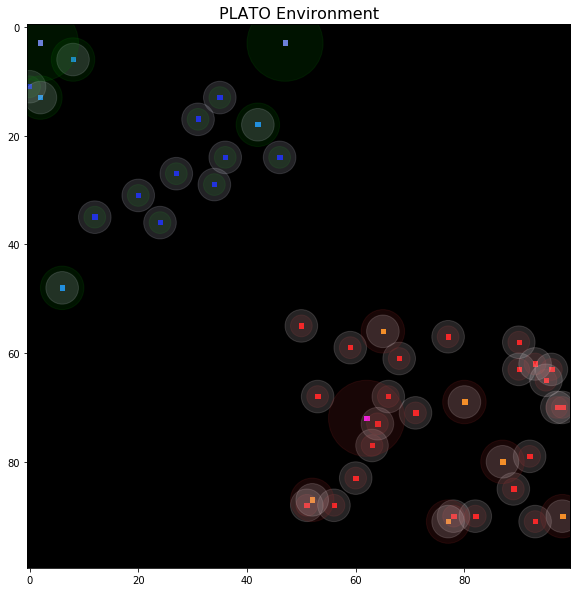

In [7]:
canvas = sim.render()

In [8]:
import random
entity = random.choice(list(sim.whites.values()))
print('{}|{} @ {}: {}'.format(entity.id, entity.entity_type, entity.xy, entity.properties))
print('n_actions', entity.n_actions)
for a in entity.action_space: print('\t',a)
print('attack actions')
print(entity.attack_actions)
for a in sorted(entity.attack_action_space): print('\t',a)
print()
print('patrol actions')
print(entity.patrol_actions)
for a in sorted(entity.patrol_action_space): print('\t',a)

HOLDFAST|infantry @ (36, 24): {'mobility': 2, 'visibility': 2, 'durability': 3}
n_actions 42
	 attack_10x11
	 attack_11x11
	 attack_9x8
	 attack_12x12
	 attack_8x9
	 attack_12x9
	 attack_10x8
	 attack_11x10
	 attack_10x7
	 attack_8x10
	 attack_10x12
	 attack_9x11
	 attack_7x10
	 attack_12x10
	 attack_10x9
	 attack_8x11
	 attack_10x13
	 attack_11x9
	 attack_9x10
	 attack_12x11
	 attack_11x12
	 attack_13x10
	 attack_8x12
	 attack_10x10
	 attack_11x8
	 attack_9x9
	 attack_8x8
	 attack_9x12
	 attack_12x8
	 patrol_10x8
	 patrol_11x10
	 patrol_10x11
	 patrol_11x11
	 patrol_10x10
	 patrol_11x9
	 patrol_9x9
	 patrol_8x10
	 patrol_10x12
	 patrol_9x10
	 patrol_9x11
	 patrol_12x10
	 patrol_10x9
attack actions
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
	 attack_10x10
	 attack_10x11
	 attack_10x12
	 attack_10x13
	 attack_10x7
	 attack_10x8
	 attack_10x9
	 attack_11x10
	 attack_11x11
	 attack_11x12
	 attack_11x8
	 attack_11x9
	 attack_1

In [9]:
def report():
    banner = '{}:\n\t{} {}'
    print('white actions:')
    for id_,action in whites.items():
        print(banner.format(id_, action, sim.whites[id_].action_space[action]))
    print()
    print('black actions:')
    for id_,action in blacks.items():
        print(banner.format(id_, action, sim.blacks[id_].action_space[action]))
    print()

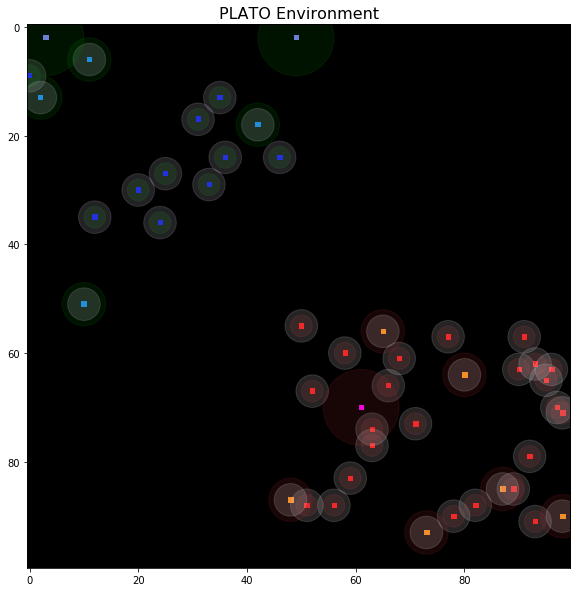

In [10]:
terminal = False
while not terminal:
    whites = {id:ent.random_action() for id,ent in sim.whites.items() if ent.operational}
    blacks = {id:ent.random_action() for id,ent in sim.blacks.items() if ent.operational}
    
    sprime, reward, terminal, metdata = sim.step(whites, blacks)
    state = sprime
        
    sim.render()
    break